# Dataproject - Fertility and Unemployment rate

#### In this data project we are examining whether there are any correlation between unemployment rates and fertility rates on a municipality level in Denmark in the years from 2007 until 2017. First we download the tables of interest from Denmark Statistics (DST) and then merge them into a combined dataset. One this combined dataset we do some graphical explorations of the evolution of the unemployment rate and the fertility rate and the correlation between the two.

In [48]:
# Importing crucial packages

## In order to run this notebook, GEOPANDAS must be installed. If you are using anaconda, this can be done
## by running the following command in the anaconda promt: "conda install -c conda-forge geopandas"
## Alternatively with pip: "pip install git+git://github.com/geopandas/geopandas.git"


import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
import pandas as pd
import pydst
import geopandas as gpd
dst = pydst.Dst(lang='en')

## 1 Downloading data from DST
We examine what datasets are available from DST

In [49]:
dst.get_subjects()

,active,desc,hasSubjects,id
0,True,Population and elections,True,02
1,True,Living conditions,True,05
2,True,Education and knowledge,True,03
3,True,Culture and National Church,True,18
4,True,"Labour, income and wealth",True,04
5,True,Prices and consumption,True,06
6,True,National accounts and government finances,True,14
7,True,Money and credit market,True,16
8,True,External economy,True,13
9,True,Business sector in general,True,07


We would like to look at "population and elections" because this is where we can find unformation about fertility rates

In [50]:
dst.get_tables(subjects=['02'])

,active,firstPeriod,id,latestPeriod,text,unit,updated,variables
0,True,2008Q1,FOLK1A,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, marital status, time]"
1,True,2008Q1,FOLK1B,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
2,True,2008Q1,FOLK1C,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, country of origin..."
3,True,2008Q1,FOLK1D,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
4,True,2008Q1,FOLK1E,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, time]"
5,True,1980,FOLK2,2019,Population 1. January,number,2019-02-11 08:00:00,"[age, sex, ancestry, citizenship, country of o..."
6,True,2008,FOLK3,2019,Population 1. January,number,2019-02-11 08:00:00,"[day of birth, birth month, year of birth, time]"
7,True,1769,FT,2019,Population figures from the censuses,number,2019-02-11 08:00:00,"[national part, time]"
8,True,2008,BEF5F,2019,People born in Faroe Islands and living in Den...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"
9,True,2008,BEF5G,2019,People born in Greenland and living in Denmark...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"


We use the table with id 'FOD407', that containts information about fertility rates in each municipality in specific years.

In [51]:
FOD407_vars = dst.get_variables(table_id='FOD407')
FOD407_vars['values'][1][:] ## age= TOT1 to include all ages

[{'id': 'TOT1', 'text': 'Total fertility rate'},
 {'id': '15-19', 'text': '15-19 years'},
 {'id': '20-24', 'text': '20-24 years'},
 {'id': '25-29', 'text': '25-29 years'},
 {'id': '30-34', 'text': '30-34 years'},
 {'id': '35-39', 'text': '35-39 years'},
 {'id': '40-44', 'text': '40-44 years'},
 {'id': '45-49', 'text': '45-49 years'}]

In [52]:
#We are only interested in the total fertility rate, hence we write 'ALDER:[TOT1]'

FOD407 = dst.get_data(table_id = 'FOD407', variables={'OMRÅDE':['*'], 'TID':['*'], 'ALDER':['TOT1'] })
FOD407.sort_values(by=['OMRÅDE', 'TID'], ascending=False)
FOD407.head()

SSLError: HTTPSConnectionPool(host='api.statbank.dk', port=443): Max retries exceeded with url: /v1/tableinfo/FOD407?lang=en&format=JSON (Caused by SSLError(SSLError("bad handshake: SysCallError(10060, 'WSAETIMEDOUT')")))

We rename each variable

In [ ]:
FOD407_en=FOD407.rename(columns={"OMRÅDE": "AREA", "TID": "YEAR", "INDHOLD": "BIRTH_RATE", "ALDER": "AGE"})
FOD407_en.head(10)

In [ ]:
#Drops AGE

FOD407_en.drop(["AGE"], axis=1, inplace=True)
FOD407_en.head()



We now look at the category "Labour, income and wealth" at Denmark Statistics

In [ ]:
dst.get_tables(subjects=['04'])

In [ ]:
AULP01_vars = dst.get_variables(table_id='AULP01')
AULP01_vars

In [ ]:
AULP01 = dst.get_data(table_id = 'AULP01', variables={'OMRÅDE':['*'], 'ALDER':['TOT'], 'KØN':['TOT'], 'TID':['*'] })
AULP01.head()

In [ ]:
AULP01_en = AULP01.rename(columns={"OMRÅDE": "AREA", "ALDER": "AGE", "KØN": "GENDER",\
                                   "TID": "YEAR", "INDHOLD": "UNEMPLOYMENT_RATE"})
AULP01_en.head(6)

In [ ]:
AULP01_en.drop(["AGE", "GENDER"], axis=1, inplace=True)
AULP01_en.head()

We now merge the two different datasets.

In [68]:
merged_data = pd.merge(FOD407_en, AULP01_en, on=['YEAR', 'AREA'], how='left')
merged_data.head(200)

,AREA,YEAR,BIRTH_RATE,UNEMPLOYMENT_RATE
0,All Denmark,2006,1847.6,NaN
1,Region Hovedstaden,2006,1706.2,NaN
2,Region Sjælland,2006,2061.2,NaN
3,Region Syddanmark,2006,1928.0,NaN
4,Region Midtjylland,2006,1919.1,NaN
5,Region Nordjylland,2006,1902.8,NaN
6,Province Byen København,2006,1555.0,NaN
7,Province Københavns omegn,2006,1924.9,NaN
8,Province Nordsjælland,2006,2143.5,NaN
9,Province Bornholm,2006,1998.8,NaN


In [63]:
missingrateBirth=merged_data[merged_data['BIRTH_RATE'] == '..']
missingrateEMPLOY=merged_data[merged_data['UNEMPLOYMENT_RATE'] == float('nan')]
print(missingrateBirth['AREA'].unique())
print(missingrateBirth['YEAR'].unique())
print(missingrateEMPLOY['AREA'].unique())

['Christiansø' 'Ærø' 'Fanø' 'Samsø' 'Læsø']
[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
[]


In [ ]:
merged_data.isnull().values.any()

We now drop the year 2006 and 2018 since, we don't have any information about the unemployment rate in these years. Also the fertility rates for the municipalities Læsø, Samsø, Ærø, Fanø and Christiansø are not given because of to few observations, so these are dropped from the data set as well. 

In [66]:
merged_data = merged_data.dropna()
merged_data = merged_data[merged_data['BIRTH_RATE'] != '..']
### HUSK AT DROPPE REGIONER ETC.!

for val in ['Region', 'Province', 'All Denmark']: 
    I = merged_data.AREA.str.contains(val)
    merged_data = merged_data.loc[I == False] # keep everything else

#Checking if they have been dropped
print(merged_data.AREA.unique())
print(merged_data.AREA.nunique())

['Copenhagen' 'Frederiksberg' 'Dragør' 'Tårnby' 'Ballerup' 'Brøndby'
 'Gentofte' 'Gladsaxe' 'Glostrup' 'Herlev' 'Albertslund' 'Hvidovre'
 'Høje-Taastrup' 'Lyngby-Taarbæk' 'Rødovre' 'Ishøj' 'Vallensbæk' 'Furesø'
 'Allerød' 'Fredensborg' 'Helsingør' 'Hillerød' 'Hørsholm' 'Rudersdal'
 'Egedal' 'Frederikssund' 'Halsnæs' 'Gribskov' 'Bornholm' 'Greve' 'Køge'
 'Roskilde' 'Solrød' 'Lejre' 'Odsherred' 'Holbæk' 'Faxe' 'Kalundborg'
 'Ringsted' 'Slagelse' 'Stevns' 'Sorø' 'Lolland' 'Næstved' 'Guldborgsund'
 'Vordingborg' 'Middelfart' 'Assens' 'Faaborg-Midtfyn' 'Kerteminde'
 'Nyborg' 'Odense' 'Svendborg' 'Nordfyns' 'Langeland' 'Haderslev'
 'Billund' 'Sønderborg' 'Tønder' 'Esbjerg' 'Varde' 'Vejen' 'Aabenraa'
 'Fredericia' 'Kolding' 'Vejle' 'Horsens' 'Syddjurs' 'Norddjurs'
 'Favrskov' 'Odder' 'Randers' 'Silkeborg' 'Skanderborg' 'Aarhus'
 'Hedensted' 'Herning' 'Holstebro' 'Lemvig' 'Struer' 'Ikast-Brande'
 'Ringkøbing-Skjern' 'Skive' 'Viborg' 'Morsø' 'Thisted' 'Brønderslev'
 'Frederikshavn' 'Vesthimmerl

Birth_rate to numeric

In [31]:
merged_data['BIRTH_RATE_F'] = pd.to_numeric(merged_data['BIRTH_RATE'])
merged_data['BIRTH_RATE_F']

133     1547.0
134     1692.6
135     2109.5
136     2227.0
137     1847.4
138     2015.5
139     1956.2
140     2023.0
141     1841.5
142     1607.2
143     1696.2
144     1841.2
145     2104.1
146     1803.6
147     2096.0
148     1896.6
149     2139.7
150     2148.8
151     2486.3
152     2194.9
153     1976.7
154     1970.9
155     1915.8
156     2124.8
157     2246.1
158     2170.5
159     2148.8
160     2273.7
161     2105.2
163     1971.3
         ...  
1362    2018.1
1363    1992.3
1364    2325.2
1365    1993.1
1366    1797.3
1367    1844.4
1368    1818.2
1369    2055.3
1370    2211.6
1371    2033.1
1372    1929.5
1373    1971.8
1374    1828.4
1375    1751.4
1376    2185.9
1377    1842.5
1378    1650.9
1379    1689.4
1380    1913.2
1381    1998.8
1382    1989.0
1383    1746.3
1384    1677.6
1385    2053.0
1386    2126.1
1387    1923.3
1388    1693.2
1389    1833.5
1390    1730.4
1391    1837.7
Name: BIRTH_RATE_F, Length: 1034, dtype: float64

# Analysis

In [32]:
## INDSÆT KORT HER

,REGIONKODE,REGIONNAVN,KOMKODE,KOMNAVN,Landsel,Landskode,geometry
0,1084,Region Hovedstaden,0400,Bornholm,Bornholm,8,"(POLYGON ((891187.49 6118170.25, 891186.3 6118..."
1,1085,Region Sjælland,0259,Køge,Østsjælland,7,"(POLYGON ((702347.24 6155011.31, 702342.570000..."
2,1085,Region Sjælland,0350,Lejre,Østsjælland,7,"(POLYGON ((684542.65 6171881.69, 684546.91 617..."
3,1085,Region Sjælland,0265,Roskilde,Østsjælland,7,"(POLYGON ((694011.6900000001 6183259.77, 69402..."
4,1085,Region Sjælland,0269,Solrød,Østsjælland,7,"(POLYGON ((703151.55 6157196.08, 703152.15 615..."


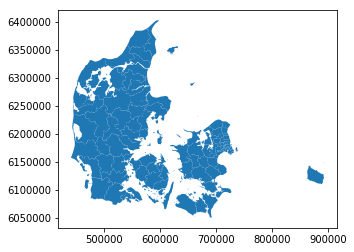

In [40]:
## KOM_MULTIPART.dbf , KOM_MULTIPART.shp and KOM_MULTIPART.shx must be placed 
## in the same folder as the saved notebook, in order for the code to work
## Read the GEO file
map_df = gpd.read_file("KOM_MULTIPART.shp")

## Plot the raw geodata
map_df.plot()

## Look the the structure of the geodata 
map_df.head()


 We are afraid some of the municipals are named differently in the map data and compared to the DST API data

In [47]:
merged_munis = merged_data.AREA.unique()
map_munis = map_df.KOMNAVN.unique()

# list of municipalities in merged_munis that are named different our map data
diff1 = [muni for muni in merged_munis if muni not in map_munis] 
diff2 = [muni for muni in map_munis if muni not in merged_munis] 

print(f'Municipalities in our API data but named differently in the map data: {diff1}')
print(f'Municipalities in our map data but named differently in API data: {diff2}')

Municipalities in our API data but named differently in the map data: ['Copenhagen', 'Høje-Taastrup']
Municipalities in our map data but named differently in API data: ['København', 'Læsø', 'Samsø', 'Ærø', 'Fanø', 'Christiansø', 'Høje Taastrup']


The map data contains the islands we dropped. This is not a proboblem as zero values are not plotted on the map. We rename our API data

In [41]:
merged_data

,AREA,YEAR,BIRTH_RATE,UNEMPLOYMENT_RATE,BIRTH_RATE_F
133,Copenhagen,2007,1547.0,5.8,1547.0
134,Frederiksberg,2007,1692.6,4.0,1692.6
135,Dragør,2007,2109.5,2.3,2109.5
136,Tårnby,2007,2227.0,3.5,2227.0
137,Ballerup,2007,1847.4,2.5,1847.4
138,Brøndby,2007,2015.5,3.5,2015.5
139,Gentofte,2007,1956.2,2.7,1956.2
140,Gladsaxe,2007,2023.0,3.2,2023.0
141,Glostrup,2007,1841.5,3.4,1841.5
142,Herlev,2007,1607.2,3.6,1607.2


In [34]:
# Laver ny variable for birth_rate index
merged_data1 = merged_data.copy()
merged_data1 = merged_data1.set_index("YEAR")

merged_data1['FERTILITY INDEX'] = merged_data1.groupby('AREA')['BIRTH_RATE_F'].transform(lambda x: x/x[2007]*100)
merged_data1.head()


,AREA,BIRTH_RATE,UNEMPLOYMENT_RATE,BIRTH_RATE_F,FERTILITY INDEX
YEAR,,,,,
2007,Copenhagen,1547.0,5.8,1547.0,100.0
2007,Frederiksberg,1692.6,4.0,1692.6,100.0
2007,Dragør,2109.5,2.3,2109.5,100.0
2007,Tårnby,2227.0,3.5,2227.0,100.0
2007,Ballerup,1847.4,2.5,1847.4,100.0


In [35]:
# Laver ny variable for unemployment index
merged_data1['UNEMPLOYMENT INDEX'] = merged_data1.groupby('AREA')['UNEMPLOYMENT_RATE'].transform(lambda x: x/x[2007]*100)
merged_data1.head()


,AREA,BIRTH_RATE,UNEMPLOYMENT_RATE,BIRTH_RATE_F,FERTILITY INDEX,UNEMPLOYMENT INDEX
YEAR,,,,,,
2007,Copenhagen,1547.0,5.8,1547.0,100.0,100.0
2007,Frederiksberg,1692.6,4.0,1692.6,100.0,100.0
2007,Dragør,2109.5,2.3,2109.5,100.0,100.0
2007,Tårnby,2227.0,3.5,2227.0,100.0,100.0
2007,Ballerup,1847.4,2.5,1847.4,100.0,100.0


In [36]:
#UNEMPLOYMENT RATE

def interactive_figure(fokus):
    # Choose nationality for the pie chart 
    merged_data2 = merged_data1[merged_data1.AREA.isin([fokus])]


    # Sum the observations grouped by the regions and plot the chart
    merged_data2.groupby('AREA')['UNEMPLOYMENT INDEX', 'FERTILITY INDEX'].plot(legend=True);
    plt.title('Development in fertilityrate and unemployment rate 2007-2017')
    #plt.figure(figsize=(20,10))
    plt.show()

liste=merged_data1.AREA.unique()

widgets.interact(interactive_figure,
    fokus=widgets.Dropdown(description="$Municipal$", options=liste, value='Slagelse'),);

interactive(children=(Dropdown(description='$Municipal$', index=39, options=('Copenhagen', 'Frederiksberg', 'D…

In [37]:
#CHANGE COLORS OF THE PLOTS

In [ ]:
#DETTE KODE SKAL SLETTES!
#FOD407_en_group = FOD407_en.groupby(['AREA','YEAR'])['BIRTH_RATE'].sum().reset_index()
#FOD407_en_group.head()